# ÇAĞRI ÇAKIROĞLU 

- AIN413 - MACHINE LEARNING FOR HEALTHCARE PROJECT 

- 2200765005 

## Hospital Stay Duration Classification

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import warnings
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, VotingClassifier
from sklearn.decomposition import PCA
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef,confusion_matrix
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
import os
from sklearn.preprocessing import PolynomialFeatures
from imblearn.over_sampling import SMOTE

# Importing classifiers
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Set up warnings
warnings.filterwarnings('ignore')

# Your code for further steps will go here


# Data Implementation

In [2]:
data = pd.read_csv("dataset/train_data.csv")

In [3]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


# Data Analysis

In [4]:
data.shape

(318438, 18)

In [5]:
data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

# COLUMN DESCRIPTION

- Column,Description
- case_id,Case_ID registered in Hospital
- Hospital_code,Unique code for the Hospital
- Hospital_type_code,Unique code for the type of Hospital
- City_Code_Hospital,City Code of the Hospital
- Hospital_region_code,Region Code of the Hospital
- Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
- Department,Department overlooking the case
- Ward_Type,Code for the Ward type
- Ward_Facility_Code,Code for the Ward Facility
- Bed Grade,Condition of Bed in the Ward
- patientid,Unique Patient Id
- City_Code_Patient,City Code for the patient
- Type of Admission,Admission Type registered by the Hospital
- Severity of Illness,Severity of the illness recorded at the time of admission
- Visitors with Patient,Number of Visitors with the patient
- Age,Age of the patient
- Admission_Deposit,Deposit at the Admission Time
- Stay,Stay Days by the patient


In [235]:
print(data.isnull().sum())


case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64


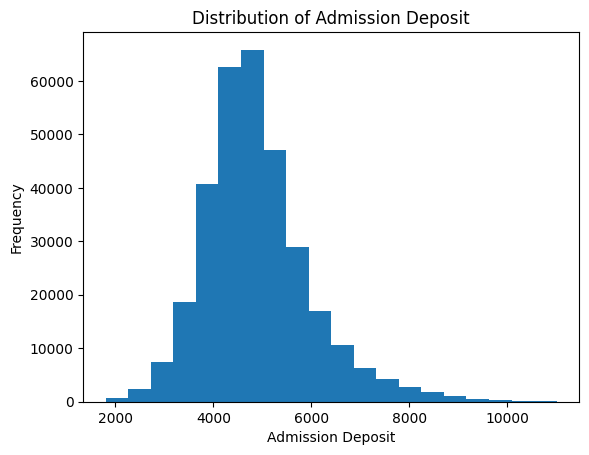

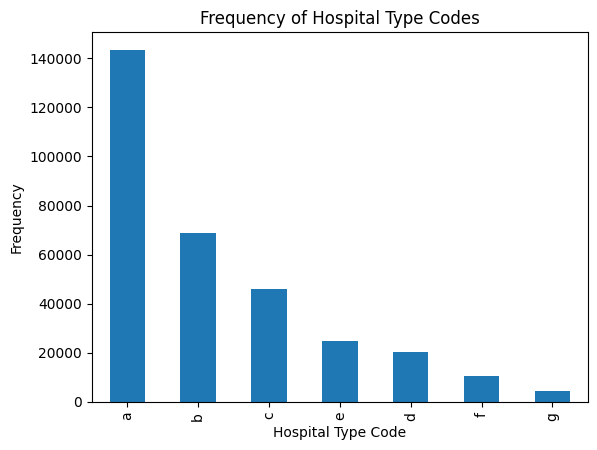

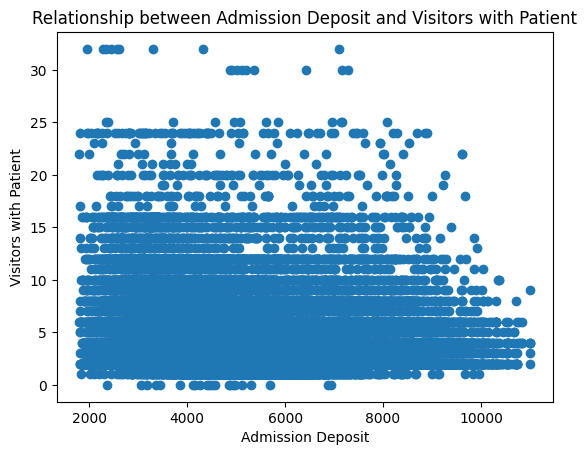

In [236]:

# Histogram for 'Admission_Deposit'
plt.hist(data['Admission_Deposit'], bins=20)
plt.title('Distribution of Admission Deposit')
plt.xlabel('Admission Deposit')
plt.ylabel('Frequency')
plt.show()

# Bar chart for 'Hospital_type_code'
data['Hospital_type_code'].value_counts().plot(kind='bar')
plt.title('Frequency of Hospital Type Codes')
plt.xlabel('Hospital Type Code')
plt.ylabel('Frequency')
plt.show()

# Scatter plot (if applicable)
plt.scatter(data['Admission_Deposit'], data['Visitors with Patient'])
plt.title('Relationship between Admission Deposit and Visitors with Patient')
plt.xlabel('Admission Deposit')
plt.ylabel('Visitors with Patient')
plt.show()




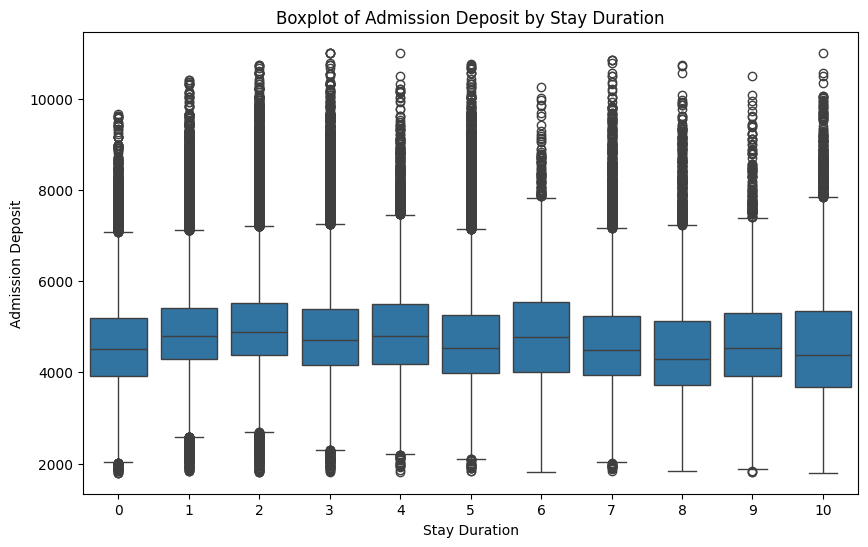

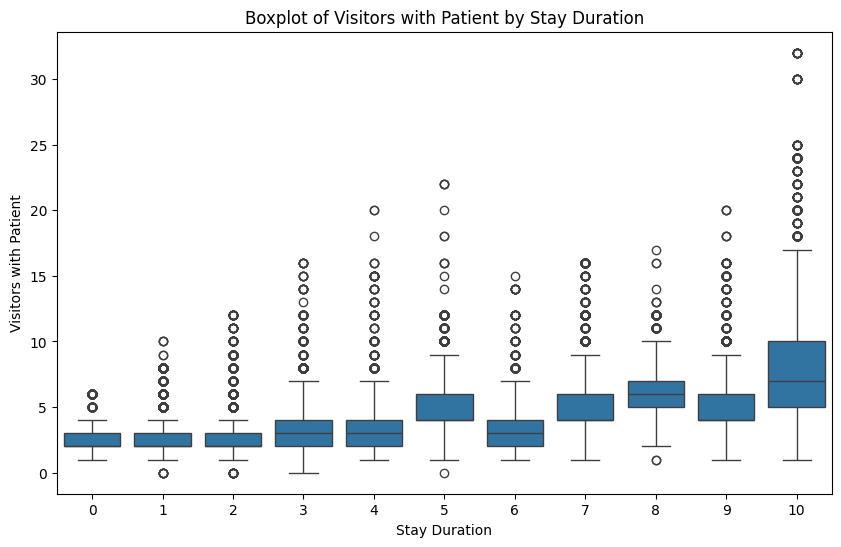

In [319]:
# Boxplot for 'Admission_Deposit'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stay', y='Admission_Deposit', data=data)
plt.title('Boxplot of Admission Deposit by Stay Duration')
plt.xlabel('Stay Duration')
plt.ylabel('Admission Deposit')
plt.show()

# Boxplot for 'Visitors with Patient'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Stay', y='Visitors with Patient', data=data)
plt.title('Boxplot of Visitors with Patient by Stay Duration')
plt.xlabel('Stay Duration')
plt.ylabel('Visitors with Patient')
plt.show()


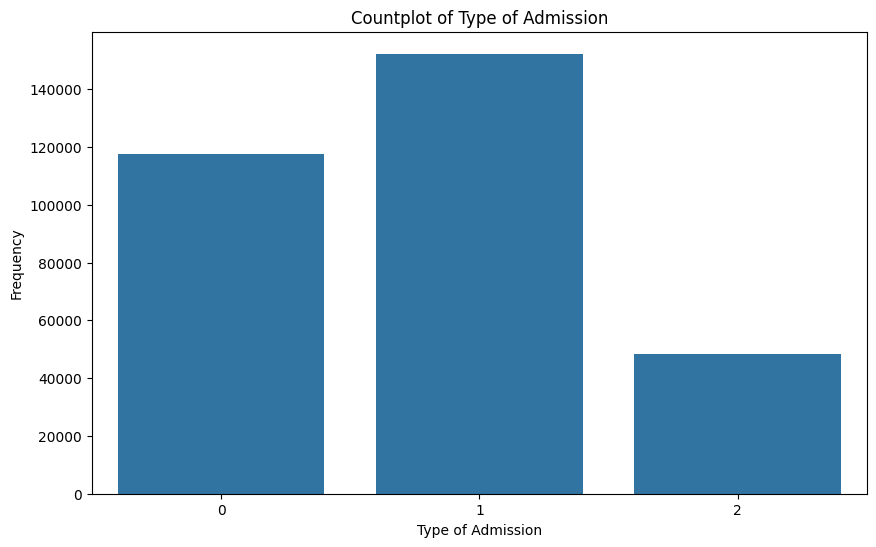

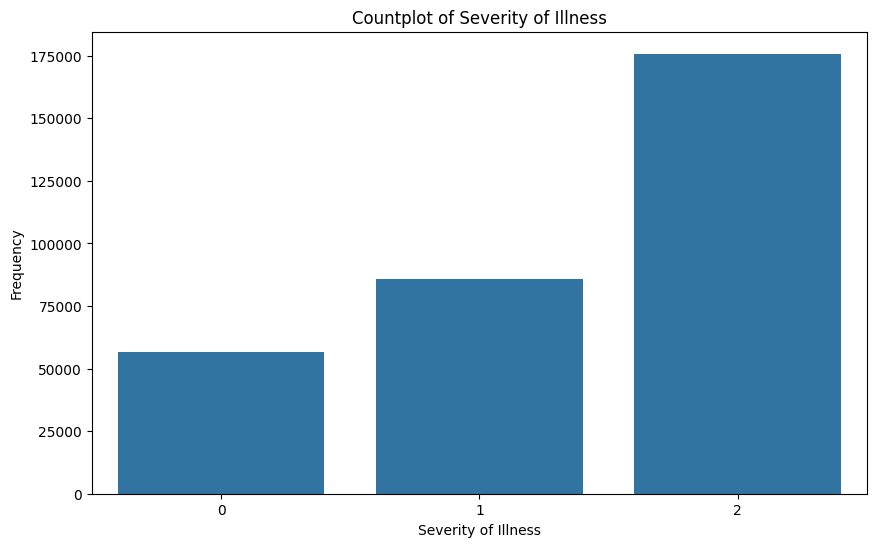

In [320]:
# Countplot for 'Type of Admission'
plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Admission', data=data)
plt.title('Countplot of Type of Admission')
plt.xlabel('Type of Admission')
plt.ylabel('Frequency')
plt.show()

# Countplot for 'Severity of Illness'
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity of Illness', data=data)
plt.title('Countplot of Severity of Illness')
plt.xlabel('Severity of Illness')
plt.ylabel('Frequency')
plt.show()


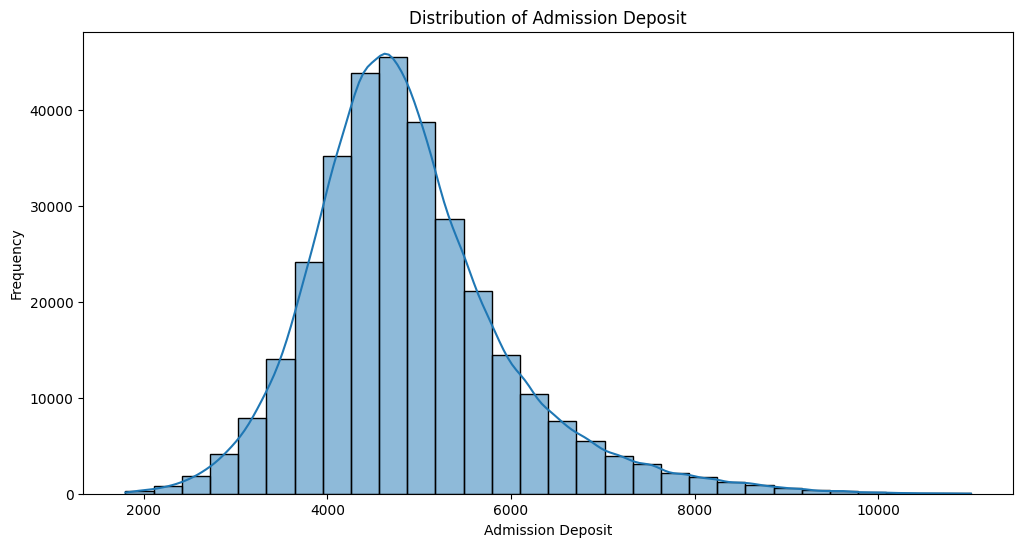

In [325]:
plt.figure(figsize=(12, 6))
sns.histplot(data['Admission_Deposit'], bins=30, kde=True)
plt.title('Distribution of Admission Deposit')
plt.xlabel('Admission Deposit')
plt.ylabel('Frequency')
plt.show()


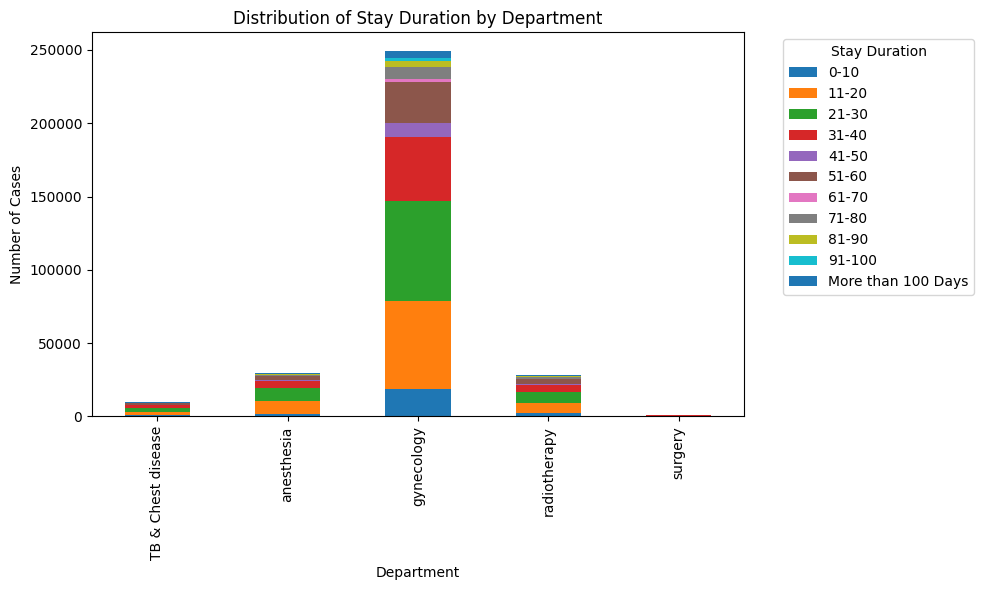

In [237]:

df_x = data.groupby(['Department', 'Stay']).size().unstack(fill_value=0)

# Plotting
df_x.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Stay Duration by Department')
plt.xlabel('Department')
plt.ylabel('Number of Cases')
plt.legend(title='Stay Duration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [6]:


# Create a Sankey diagram
sankey_data = data.groupby(['Department', 'Stay']).size().reset_index(name='count')

# Combine Department and Stay unique values for the labels
labels = list(sankey_data['Department'].unique()) + list(sankey_data['Stay'].unique())
label_index = {label: i for i, label in enumerate(labels)}

# Map Department to source and Stay to target
sources = sankey_data['Department'].map(label_index)
targets = sankey_data['Stay'].map(label_index)
values = sankey_data['count']

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Sankey Diagram of Patient Flow from Departments to Stay Durations", font_size=10)
fig.show()


In [13]:

fig = px.sunburst(data, path=['Hospital_type_code', 'Department', 'Severity of Illness', 'Stay'],
                  values='case_id', title='Sunburst Plot of Stay Duration by Various Categories')
fig.update_layout(width = 1336, height= 768)
fig.show()


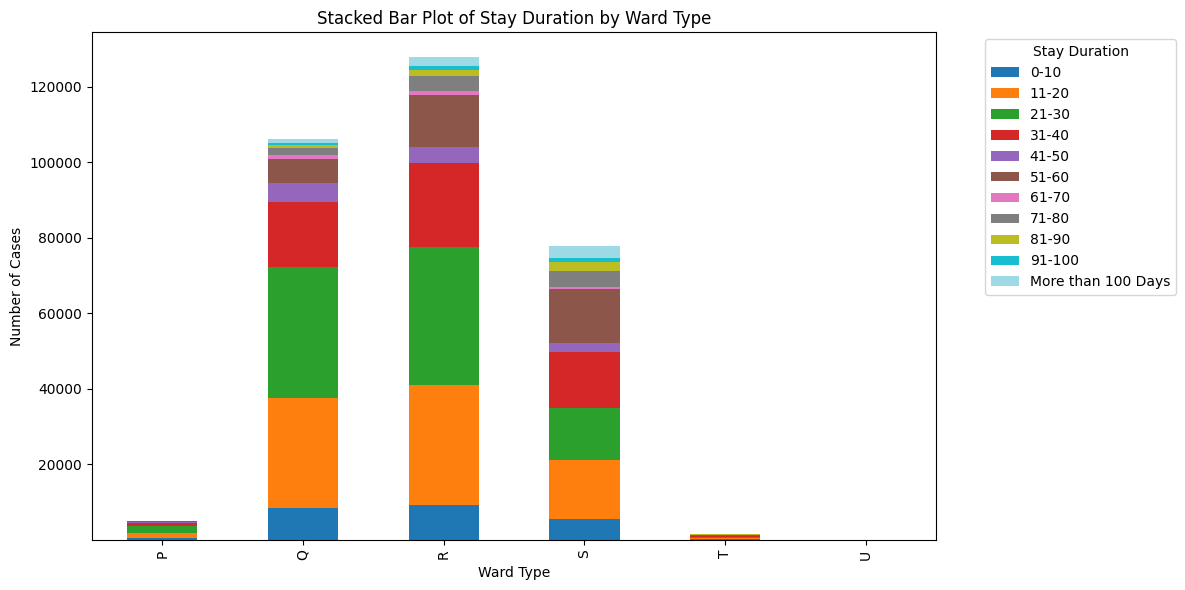

In [10]:
stay_ward_pivot = data.groupby(['Ward_Type', 'Stay']).size().unstack(fill_value=0)
stay_ward_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Stacked Bar Plot of Stay Duration by Ward Type')
plt.xlabel('Ward Type')
plt.ylabel('Number of Cases')
plt.legend(title='Stay Duration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


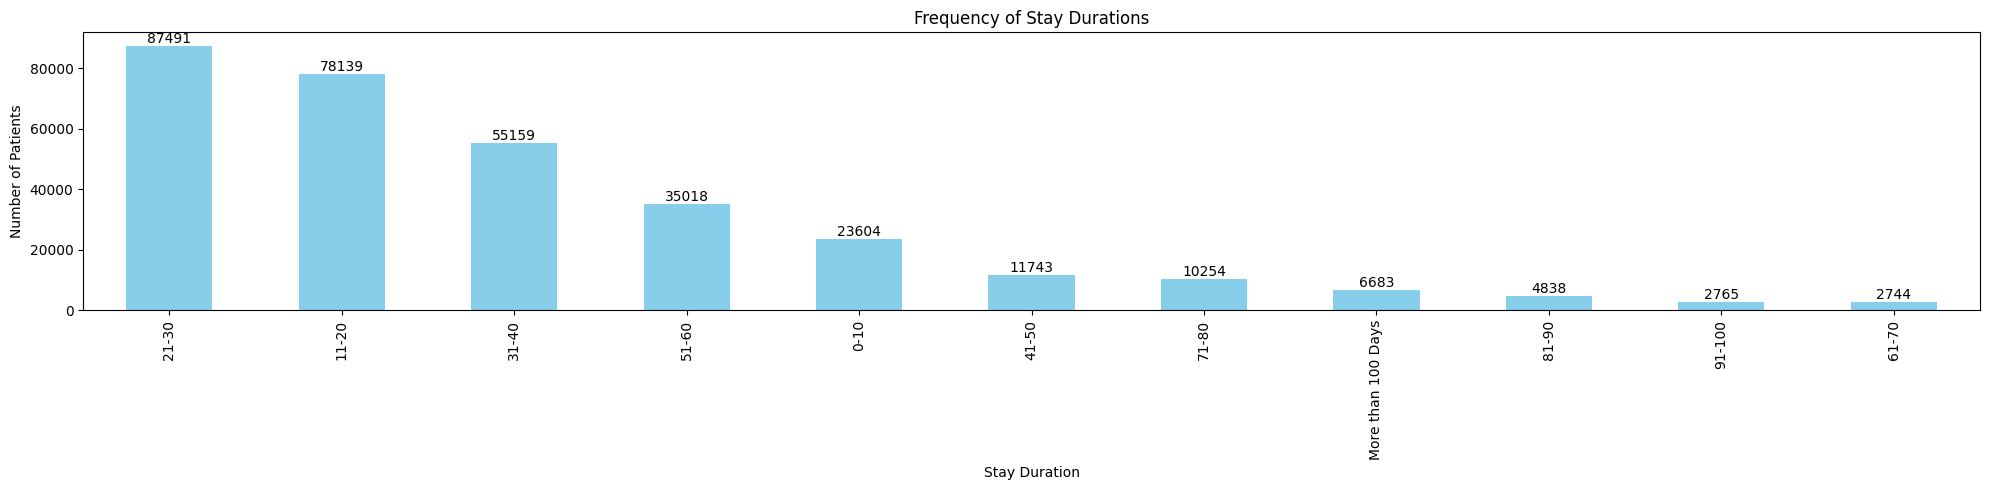

In [238]:

# Assuming df_train is your main dataframe and it's already loaded
# Counting the occurrences of each 'Stay' category and sorting them
stay_counts = data['Stay'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(20, 5))  # Setting the figure size
ax = stay_counts.plot(kind='bar', color='skyblue')  # Creating a bar plot
ax.set_title('Frequency of Stay Durations')  # Setting the title of the plot
ax.set_xlabel('Stay Duration')  # Setting the x-axis label
ax.set_ylabel('Number of Patients')  # Setting the y-axis label

# Adding the labels on top of each bar
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()  # Adjust layout to fit everything
plt.show() 

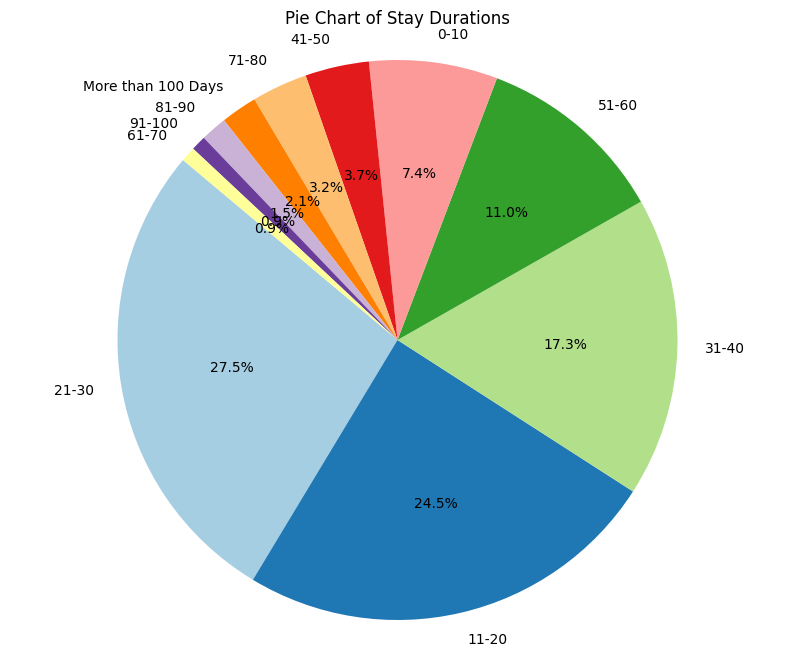

In [239]:

# Assuming 'data' is your main dataframe and it's already loaded
# Counting the occurrences of each 'Stay' category
stay_counts = data['Stay'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))  # Setting the figure size
plt.pie(stay_counts, labels=stay_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(stay_counts))))
plt.title('Pie Chart of Stay Durations')  # Setting the title of the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()  # Display the plot


# DROPPING UNNECESSARY COLUMNS 

In [240]:
data = data.drop(['Hospital_region_code', "City_Code_Hospital"],axis =1)

# BED GRADE FILLING 

In [241]:
bed_grade_mode = data['Bed Grade'].mode()[0]  # [0] is used to select the first mode in case there are multiple modes

 # Fill in null values in the 'Bed Grade' column with the mode
data['Bed Grade'].fillna(bed_grade_mode, inplace=True)

# Optionally, verify that there are no more null values in the 'Bed Grade' column
print(data['Bed Grade'].isnull().sum())  # Thi

0


This code calculates the most frequent value (mode) of the 'Bed Grade' column and uses this value to fill any missing values in the same column. The final step is to verify that there are no remaining null values in the 'Bed Grade' column by printing the count of null values, which should be 0 if the operation was successful.









# City_Code_Patient FILLING

In [242]:
City_Code_Patient_mode = data['City_Code_Patient'].mode()[0]  # [0] is used to select the first mode in case there are multiple modes

# Fill in null values in the 'City_Code_Patient' column with the mode
data['City_Code_Patient'].fillna(City_Code_Patient_mode, inplace=True)

# Optionally, verify that there are no more null values in the 'City_Code_Patient column
print(data['City_Code_Patient'].isnull().sum())  # Thi

0


This code calculates the most frequent value (mode) of the 'City_Code_Patient' column and uses this value to fill any missing values in the same column. The final step is to verify that there are no remaining null values in the 'City_Code_Patient' column by printing the count of null values, which should be 0 if the operation was successful.

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  object 
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   Bed Grade                          318438 non-null  float64
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  318438 non-null  float64
 10  Type of Admission                  318438 non-null  object 
 11  Severity of Illness                3184

In [244]:
stay_value = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}
age_value = {'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}

# AGE AND STAY RANGE CONVERT


In [245]:
data["Stay"].unique()

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [246]:
data['Stay'] = data['Stay'].replace(stay_value.keys(), stay_value.values())
data['Age'] = data['Age'].replace(age_value.keys(), age_value.values())

In [247]:
print(data["Stay"].unique())
print(data["Age"].unique())


[ 0  4  3  1  5  2  7 10  8  6  9]
[5 7 3 4 8 6 2 1 0 9]


In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   Available Extra Rooms in Hospital  318438 non-null  int64  
 4   Department                         318438 non-null  object 
 5   Ward_Type                          318438 non-null  object 
 6   Ward_Facility_Code                 318438 non-null  object 
 7   Bed Grade                          318438 non-null  float64
 8   patientid                          318438 non-null  int64  
 9   City_Code_Patient                  318438 non-null  float64
 10  Type of Admission                  318438 non-null  object 
 11  Severity of Illness                3184

# LABEL ENCODING

In [249]:

# List of categorical columns you might want to label encode
categorical_cols = ["Department", 'Hospital_type_code', 'Ward_Facility_Code', "Ward_Type", "Type of Admission", "Severity of Illness"]  # Add other categorical columns if necessary

# Creating an instance of label encoder
label_encoder = LabelEncoder()

# Applying label encoding to each categorical column
for column in categorical_cols:
    data[column] = label_encoder.fit_transform(data[column])

# Displaying the first few rows of the dataframe to verify changes

data_encoded= data.copy()
print(data_encoded.head())


   case_id  Hospital_code  Hospital_type_code  \
0        1              8                   2   
1        2              2                   2   
2        3             10                   4   
3        4             26                   1   
4        5             26                   1   

   Available Extra Rooms in Hospital  Department  Ward_Type  \
0                                  3           3          2   
1                                  2           3          3   
2                                  2           1          3   
3                                  2           3          2   
4                                  2           3          3   

   Ward_Facility_Code  Bed Grade  patientid  City_Code_Patient  \
0                   5        2.0      31397                7.0   
1                   5        2.0      31397                7.0   
2                   4        2.0      31397                7.0   
3                   3        2.0      31397                7.0

In [250]:
# Convert all boolean columns to int (0 and 1)
for col in data_encoded.columns:
    if data_encoded[col].dtype == bool:
        data_encoded[col] = data_encoded[col].astype(int)

# Show the modified DataFrame
data_encoded.head()




,case_id,Hospital_code,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,3,2,5,2.0,31397,7.0,0,0,2,5,4911.0,0
1,2,2,2,2,3,3,5,2.0,31397,7.0,1,0,2,5,5954.0,4
2,3,10,4,2,1,3,4,2.0,31397,7.0,1,0,2,5,4745.0,3
3,4,26,1,2,3,2,3,2.0,31397,7.0,1,0,2,5,7272.0,4
4,5,26,1,2,3,3,3,2.0,31397,7.0,1,0,2,5,5558.0,4


In [251]:

y = data_encoded['Stay']
X = data_encoded.drop(columns=["Stay","case_id"])



In [252]:

# Split: Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Test set size: {X_test.shape}, {y_test.shape}")


Training set size: (222906, 14), (222906,)
Test set size: (95532, 14), (95532,)


# TO MAX SMOTE 

In [254]:

# Current distribution from your data
current_distribution = {
    0: 23604,
    1: 78139,
    2: 87491,
    3: 55159,
    4: 11743,
    5: 35018,
    6: 2744,
    7: 10254,
    8: 4838,
    9: 2765,
    10: 6683
}

# Calculate half of the maximum class count
max_class_count = max(current_distribution.values())
target_count = max_class_count

# Setting each class to have at least half the count of the maximum class
sampling_strategy = {cls: max(count, target_count) for cls, count in current_distribution.items()}

# Create SMOTE object with specific strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Apply SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



# 20K SMOTE

In [255]:


# Current distribution from your data
current_distribution = {
    0: 23604,
    1: 78139,
    2: 87491,
    3: 55159,
    4: 11743,
    5: 35018,
    6: 2744,
    7: 10254,
    8: 4838,
    9: 2765,
    10: 6683
}

# Calculate half of the maximum class count
max_class_count = max(current_distribution.values())
target_count = 20000

# Setting each class to have at least half the count of the maximum class
sampling_strategy = {cls: max(count, target_count) for cls, count in current_distribution.items()}

# Create SMOTE object with specific strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Apply SMOTE
X_train_smote_20k, y_train_smote_20k = smote.fit_resample(X_train, y_train)



# ORIGINAL DATA DISTRIBUTION

In [256]:
counter = Counter(y_train)
for k, v in counter.items():
    dist = v / len(y_train) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=54697 (24.5381461243753%)
Class=2, n=61244 (27.475258629197956%)
Class=3, n=38611 (17.32165127901447%)
Class=5, n=24512 (10.996563573883162%)
Class=10, n=4678 (2.0986424770979695%)
Class=8, n=3387 (1.5194745767274098%)
Class=4, n=8220 (3.687653091437646%)
Class=9, n=1935 (0.868078921159592%)
Class=0, n=16523 (7.412541609467668%)
Class=7, n=7178 (3.2201914708442123%)
Class=6, n=1921 (0.8617982467946129%)


# 20K SMOTE DATA DISTRIBUTION

In [257]:
counter = Counter(y_train_smote_20k)
for k, v in counter.items():
    dist = v / len(y_train_smote_20k) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=78139 (19.56355733818047%)
Class=2, n=87491 (21.90500512003926%)
Class=3, n=55159 (13.810085350678875%)
Class=5, n=35018 (8.767410011241553%)
Class=10, n=20000 (5.007373357268579%)
Class=8, n=20000 (5.007373357268579%)
Class=4, n=20000 (5.007373357268579%)
Class=9, n=20000 (5.007373357268579%)
Class=0, n=23604 (5.909702036248376%)
Class=7, n=20000 (5.007373357268579%)
Class=6, n=20000 (5.007373357268579%)


# TO MAX SMOTE DATA DISTRIBUTION

In [258]:
counter = Counter(y_train_smote)
for k, v in counter.items():
    dist = v / len(y_train_smote) * 100
    print(f"Class={k}, n={v} ({dist}%)")

Class=1, n=87491 (9.090909090909092%)
Class=2, n=87491 (9.090909090909092%)
Class=3, n=87491 (9.090909090909092%)
Class=5, n=87491 (9.090909090909092%)
Class=10, n=87491 (9.090909090909092%)
Class=8, n=87491 (9.090909090909092%)
Class=4, n=87491 (9.090909090909092%)
Class=9, n=87491 (9.090909090909092%)
Class=0, n=87491 (9.090909090909092%)
Class=7, n=87491 (9.090909090909092%)
Class=6, n=87491 (9.090909090909092%)


In [259]:


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# FEATURE IMPORTANCE

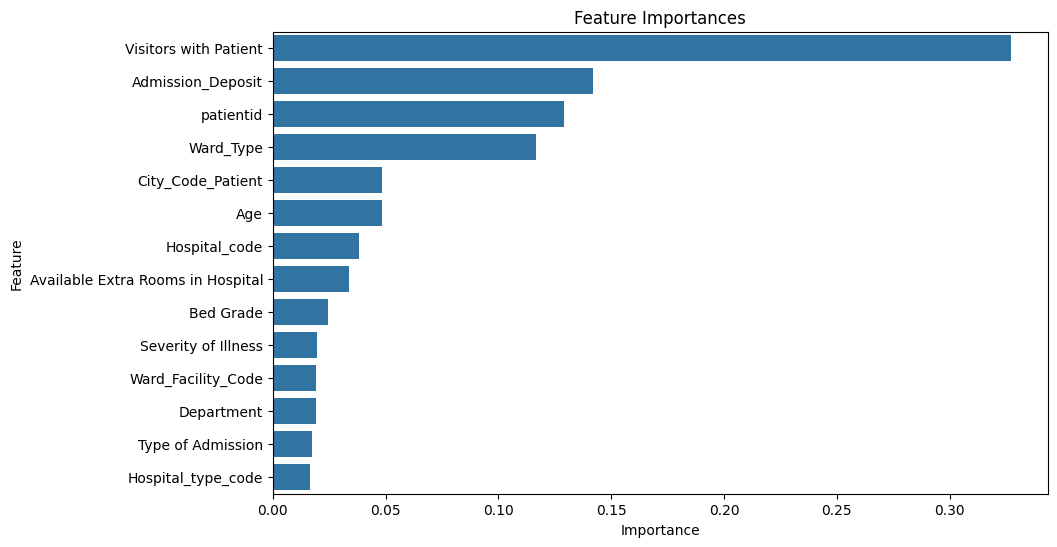

In [260]:




X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled_df, y_train)


feature_importances = model.feature_importances_
features = X_train_scaled_df.columns

feature_importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

In [261]:


# Initialize the StandardScaler
scaler_smote = StandardScaler()

# Fit the scaler on the training data
X_train_scaled_smote = scaler_smote.fit_transform(X_train_smote)

# Transform the test data using the same scaler
X_test_scaled_smote = scaler_smote.transform(X_test)



In [262]:

# Initialize the StandardScaler
scaler_smote_20k = StandardScaler()

# Fit the scaler on the training data
X_train_scaled_smote_20k = scaler_smote_20k.fit_transform(X_train_smote_20k)

# Transform the test data using the same scaler
X_test_scaled_smote_20k = scaler_smote_20k.transform(X_test)



# PCA

In [263]:


pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Optional: Check the explained variance ratio
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

# Display the first few rows of the PCA-transformed training data
print(pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])]).head())



# Display the first few rows of the PCA-transformed test data
print(pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])]).head())


Explained variance ratio by each principal component:
[0.12791823 0.09656003 0.08505716 0.07871334 0.07340118 0.07190246
 0.07112929 0.06996589 0.06576836 0.06383404 0.05999875 0.05188487
 0.04845811]
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.099033 -1.057758  2.267784 -0.508524 -0.177796  0.542312 -1.671511   
1  0.078115 -0.017175 -0.866810 -1.030713 -1.233195 -1.283142  0.213680   
2 -0.022402  0.324747  0.707272 -1.341054 -0.946341  1.178105 -0.921514   
3 -0.639606 -0.988256 -1.448731  0.013196 -0.068557 -0.551374 -0.154250   
4  1.675256  0.754056 -0.461296  1.582289 -0.444332 -1.015875 -0.639956   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -2.752494  0.254990 -0.817519  0.207924  0.155768  0.728208  
1  0.387731  0.371606 -0.385851 -0.016365  0.078384 -0.124144  
2  0.797406  0.626708  0.013549 -0.280620  0.432037  0.608494  
3 -0.286361  0.437061 -1.096547 -0.028561 -0.136789 -1.003541  
4  1.041832 -0.160275  1.448

# LIGHT GBM TO MEASURE ALL THE DATASETS ( ORIGINAL - TO MAX SMOTE - 20K SMOTE - PCA DATA)

In [287]:

# Uyarıları bastırma
warnings.filterwarnings("ignore")

# LightGBM modeli
def evaluate_model(X_train, y_train, X_test, y_test, description):
    lgb_cl = lgb.LGBMClassifier(
        boosting_type='gbdt', 
        learning_rate=0.1, 
        n_estimators=10000, 
        importance_type='gain', 
        objective='multiclass', 
        num_boost_round=100,
        num_leaves=500, 
        max_depth=7, 
        max_bin=60, 
        bagging_fraction=0.9, 
        feature_fraction=0.9, 
        subsample_freq=2, 
        scale_pos_weight=2.5, 
        random_state=1994, 
        verbosity= -1,
        callbacks=[
        lgb.early_stopping(stopping_rounds=3),
    ],
        n_jobs=-1
    )

    lgb_cl.fit(X_train, y_train)
    preds = lgb_cl.predict(X_test)

    atrain = round(lgb_cl.score(X_train, y_train) * 100, 2)
    acc = round(accuracy_score(y_test, preds) * 100, 2)
    f1 = round(f1_score(y_test, preds, average='weighted') * 100, 2)
    mcc = matthews_corrcoef(y_test, preds)

    print(f'{description} - Train accuracy: {atrain}%')
    print(f'{description} - Test accuracy: {acc}%')
    print(f'{description} - F1 Score: {f1}%')
    print(f'{description} - Matthews Correlation Coefficient (MCC): {mcc:.2f}\n')

# PCA ile dönüştürülmüş veri
evaluate_model(X_train_pca, y_train, X_test_pca, y_test, 'PCA  Data')

# Orijinal SMOTE verisi
evaluate_model(X_train_scaled_smote, y_train_smote, X_test_scaled_smote, y_test, 'To Max SMOTE Data')

# 20k SMOTE verisi
evaluate_model(X_train_scaled_smote_20k, y_train_smote_20k, X_test_scaled_smote_20k, y_test, '20k SMOTE Data')

# Orijinal ölçeklenmiş veri
evaluate_model(X_train_scaled, y_train, X_test_scaled, y_test, 'Scaled-Original  Data')




PCA  Data - Train accuracy: 49.66%
PCA  Data - Test accuracy: 39.36%
PCA  Data - F1 Score: 35.66%
PCA  Data - Matthews Correlation Coefficient (MCC): 0.23

To Max SMOTE Data - Train accuracy: 46.74%
To Max SMOTE Data - Test accuracy: 39.9%
To Max SMOTE Data - F1 Score: 37.55%
To Max SMOTE Data - Matthews Correlation Coefficient (MCC): 0.25

20k SMOTE Data - Train accuracy: 45.81%
20k SMOTE Data - Test accuracy: 42.03%
20k SMOTE Data - F1 Score: 38.69%
20k SMOTE Data - Matthews Correlation Coefficient (MCC): 0.26

Scaled-Original  Data - Train accuracy: 48.03%
Scaled-Original  Data - Test accuracy: 42.37%
Scaled-Original  Data - F1 Score: 39.01%
Scaled-Original  Data - Matthews Correlation Coefficient (MCC): 0.27



In [300]:
lgb_cl_original = lgb.LGBMClassifier(
    boosting_type='gbdt', 
    learning_rate=0.1, 
    n_estimators=10000, 
    importance_type='gain', 
    objective='multiclass', 
    num_boost_round=100,
    num_leaves=500, 
    max_depth=7, 
    max_bin=60, 
    bagging_fraction=0.9, 
    feature_fraction=0.9, 
    subsample_freq=2, 
    scale_pos_weight=2.5, 
    random_state=1994, 
    verbosity=-1,
    callbacks=[
        lgb.early_stopping(stopping_rounds=3),
    ],
    n_jobs=-1
)

lgb_cl_original.fit(X_train_scaled, y_train)

LGBMClassifier(bagging_fraction=0.9,
               callbacks=[<lightgbm.callback._EarlyStoppingCallback object at 0x2a01a1630>],
               feature_fraction=0.9, importance_type='gain', max_bin=60,
               max_depth=7, n_estimators=10000, n_jobs=-1, num_boost_round=100,
               num_leaves=500, objective='multiclass', random_state=1994,
               scale_pos_weight=2.5, subsample_freq=2, verbosity=-1)

# XGB

In [290]:


# Define the parameter grid



param_grid = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.01, 0.1, 0.005],
    'max_depth': [3, 5, 7,9]
}

# Setup GridSearchCV
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), 
                           param_grid, cv=2, scoring='accuracy', verbose=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2; 3/48] START learning_rate=0.01, max_depth=3, n_estimators=150..........
[CV 2/2; 1/48] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 1/2; 2/48] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 1/2; 4/48] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 2/2; 4/48] START learning_rate=0.01, max_depth=3, n_estimators=200..........
[CV 1/2; 1/48] START learning_rate=0.01, max_depth=3, n_estimators=50...........
[CV 2/2; 2/48] START learning_rate=0.01, max_depth=3, n_estimators=100..........
[CV 2/2; 3/48] START learning_rate=0.01, max_depth=3, n_estimators=150..........
[CV 1/2; 1/48] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.378 total time=   6.8s
[CV 2/2; 1/48] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.373 total time=   6.9s
[CV 1/2; 5/48] START learning_rate=0.01, max_depth=5, n_estimators=50...........
[CV 2/2;

In [291]:
# Initialize the model with the best parameters
best_xgb = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='mlogloss')
best_xgb.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_xgb.predict(X_test_scaled)


In [292]:

# Evaluation metrics
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)   # Use 'weighted' to consider class imbalance

print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 Score:", f1)
print("MCC:", mcc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 42.31%
F1 Score: 0.3868651575602575
MCC: 0.2652595212246571
Confusion Matrix:
 [[  972  3492  2565    32     1    19     0     0     0     0     0]
 [  524 11962  9158  1034     6   749     0     4     3     0     2]
 [  403  7756 17253   343     1   416     2     5    38     1    29]
 [  254  2853  6850  3751     6  2757     0    14    23     4    36]
 [  120   669  2213   209     6   255     1    10    11     4    25]
 [  118   792  1563  2360     5  5305     2    18   204     4   135]
 [   25   103   465    71     1   127     0     1     9     1    20]
 [   42   165   318   575     1  1658     2    77    39     1   198]
 [   14    56    67   139     0   770     0     3   262     0   140]
 [    5    40    81   141     0   434     0     7    13     6   103]
 [   33    74   109   127     0   645     1    42   143     5   826]]


# DECISION TREE 

In [294]:

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30,40,50,100,200],
    'min_samples_split': [ 5, 10,20,50],
    'min_samples_leaf': [1,2, 4,7,9]
}

# Setup GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, scoring='accuracy', verbose=-1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 50}


In [295]:
# Initialize the model with the best parameters
best_decision_tree = DecisionTreeClassifier(**grid_search.best_params_)
best_decision_tree.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_dt = best_decision_tree.predict(X_test_scaled)


In [296]:




acc_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='micro')  # Use 'weighted' to consider class imbalance
mcc_dt = matthews_corrcoef(y_test, y_pred_dt)  # Matthews Correlation Coefficient

print("Accuracy: {:.2f}%".format(acc_dt * 100))
print("F1 Score:", f1_dt)
print("MCC:", mcc_dt)
print("Confusion Matrix:\n", conf_matrix_dt)

Accuracy: 41.02%
F1 Score: 0.4102290332035339
MCC: 0.24732923483749875
Confusion Matrix:
 [[  925  3098  2973    60     4    21     0     0     0     0     0]
 [  616 10849 10178  1093     2   697     0     2     2     0     3]
 [  503  7329 17573   391     5   366     4     2    47     1    26]
 [  266  2833  6937  3922     2  2516     0    21    16     2    33]
 [  113   666  2235   234     1   232     1     3    10     2    26]
 [  138   795  1625  2741     2  4884     3    23   154     4   137]
 [   27   127   447    68     0   125     0     7     6     0    16]
 [   42   180   354   706     1  1499     1    73    39     3   178]
 [   10    64    73   226     0   693     1    12   255     3   114]
 [    3    38   103   188     0   372     1    18     8     6    93]
 [   30    85   118   184     0   605     2    83   179    17   702]]


# VOTING

In [301]:


# Create voting classifier
voting_clf = VotingClassifier(estimators=[
    ('dt', best_decision_tree), 
    ('xgb', best_xgb), 
    ('lgb', lgb_cl_original)],
    voting='soft')



In [303]:


 # Retain 95% of variance

# Create the voting classifier
pipeline = Pipeline(steps=[
    ('voting', voting_clf)
])

# Train
pipeline.fit(X_train_scaled, y_train)

# Predict
y_pred = pipeline.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Ensemble Accuracy: {accuracy:.2f}')

Voting Ensemble Accuracy: 0.42


# SVM 

In [304]:


# Initialize the SVM classifier
svm_cl = SVC(
    C=0.5,           # Reduced regularization parameter
    kernel='linear',  # Disabling shrinking heuristic
    tol=0.01,         # Increased tolerance for stopping criterion
    cache_size=5000,
    verbose=2,
    max_iter=10000,   # Limiting the maximum number of iterations
    random_state=42
)

# Fit the SVM on the scaled training data
svm_cl.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = svm_cl.predict(X_test_scaled)


[LibSVM].........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -8978.549856, rho = 1.381012
nSV = 18376, nBSV = 17006
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -8892.175512, rho = 1.117214
nSV = 18158, nBSV = 16739
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -7841.299023, rho = 0.766115
nSV = 16450, nBSV = 14467
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -5433.081972, rho = -0.058521
nSV = 11770, nBSV = 9591
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -5688.707934, rho = 0.166904
nSV = 12138, nBSV = 10175
.........WARN: libsvm Solver reached max_iter
optimization finished, #iter = 10000
obj = -1862.623169, rho = -0.915599
nSV = 4370, nBSV = 3178
......
*
optimization finished, #iter = 6596
obj = -2080.610873, rho = -0.650839
nSV = 4832, nBSV = 3645
...
*
optimization finis

In [305]:

# Calculate the metrics
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, y_pred)

# Printing the results
print(f"Accuracy of the SVM model: {acc:.2f}")
print(f"F1 Score of the SVM model: {f1:.2f}")
print(f"Matthews Correlation Coefficient (MCC) of the SVM model: {mcc:.2f}")


Accuracy of the SVM model: 0.22
F1 Score of the SVM model: 0.22
Matthews Correlation Coefficient (MCC) of the SVM model: 0.07


# KNN

In [306]:


# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}

# Setup GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid,cv = 2,  scoring='accuracy', verbose=10, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best model
best_knn = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)




Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV 2/2; 4/6] START metric=manhattan, n_neighbors=3.............................
[CV 2/2; 2/6] START metric=euclidean, n_neighbors=5.............................
[CV 1/2; 3/6] START metric=euclidean, n_neighbors=7.............................
[CV 1/2; 1/6] START metric=euclidean, n_neighbors=3.............................
[CV 1/2; 4/6] START metric=manhattan, n_neighbors=3.............................
[CV 1/2; 2/6] START metric=euclidean, n_neighbors=5.............................
[CV 2/2; 1/6] START metric=euclidean, n_neighbors=3.............................
[CV 2/2; 3/6] START metric=euclidean, n_neighbors=7.............................
[CV 2/2; 1/6] END metric=euclidean, n_neighbors=3;, score=0.298 total time= 4.4min
[CV 1/2; 5/6] START metric=manhattan, n_neighbors=5.............................
[CV 1/2; 1/6] END metric=euclidean, n_neighbors=3;, score=0.296 total time= 4.4min
[CV 2/2; 5/6] START metric=manhattan, n_neigh

In [307]:
# Predict and evaluate using the best model
best_y_pred = best_knn.predict(X_test_scaled)
best_conf_matrix = confusion_matrix(y_test, best_y_pred)
best_acc = accuracy_score(y_test, best_y_pred)
best_f1 = f1_score(y_test, best_y_pred, average='weighted')
mcc = matthews_corrcoef(y_test, best_y_pred)   # Use 'weighted' to consider class imbalance




print("Best Model Accuracy:", best_acc)
print("Best Model F1 Score:", best_f1)
print("Best Model Confusion Matrix:\n", best_conf_matrix)
print("MCC:",mcc)

Best Model Accuracy: 0.34638655110329525
Best Model F1 Score: 0.32436691883369434
Best Model Confusion Matrix:
 [[ 1172  3229  2239   352    24    54     0     9     0     1     1]
 [ 1676 11348  8019  1779    71   504     4    29     3     3     6]
 [ 1358  9445 13009  1876   124   375     1    23    13     2    21]
 [  675  4751  5511  3584    77  1788     4    87    31     9    31]
 [  212  1024  1609   442    35   155     1    19     5     6    15]
 [  312  1937  1981  2713    49  3074     4   237    90    20    89]
 [   46   212   334   108    13    87     0     9     1     2    11]
 [   74   502   523   715    19   926     5   153    28    13   118]
 [   21   133   119   345     6   584     1    43   119     8    72]
 [   19    95   143   187    13   235     1    41     9    19    68]
 [   34   154   155   318     5   570     4   107    63    17   578]]
MCC: 0.16628469099992052


# LogReg

In [308]:


# Generate polynomial and interaction features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [309]:

os.environ['JOBLIB_VERBOSITY'] = "6"

# Define the parameter grid
param_grid = {
    'C': [1, 10, 100],  # Regularization strength
    'penalty': ['l2','l1', 'none']  # Penalty type
}

# Initialize the GridSearchCV object with the correct solver for L1 and L2 penalties
grid_search = GridSearchCV(
    LogisticRegression(multi_class='multinomial', solver='saga', max_iter=20),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=-1,
    n_jobs=-1   # Higher numbers give more detailed logs
)


# Fit the grid search to the data
grid_search.fit(X_train_poly, y_train)

# Using the best parameters from the grid search
model = grid_search.best_estimator_
y_pred_lr = model.predict(X_test_poly)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

Best parameters: {'C': 1, 'penalty': 'l1'}


In [310]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, matthews_corrcoef

acc_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
f1_lr= f1_score(y_test, y_pred_lr, average='micro')  # Use 'weighted' to consider class imbalance
mcc_lr = matthews_corrcoef(y_test, y_pred_lr)  # Matthews Correlation Coefficient

print("Accuracy: {:.2f}%".format(acc_lr * 100))
print("F1 Score:", f1_lr)
print("MCC:", mcc_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

Accuracy: 27.47%
F1 Score: 0.274682828790353
MCC: 0.006112220026407619
Confusion Matrix:
 [[   19   154  6881     0     0     0     0     0    26     1     0]
 [   13   182 23221     0     0     0     0     0    25     1     0]
 [   12   180 26036     0     0     0     0     0    19     0     0]
 [   20   202 16313     0     0     0     0     0    10     3     0]
 [    7    57  3452     0     0     0     0     0     7     0     0]
 [   14   184 10289     0     0     0     0     0    19     0     0]
 [    2    13   799     0     0     0     0     0     7     2     0]
 [    6    75  2984     0     0     0     0     0    10     1     0]
 [    4    38  1405     0     0     0     0     0     4     0     0]
 [    5     5   815     0     0     0     0     0     5     0     0]
 [    5    60  1923     0     0     0     0     0    15     2     0]]


# CAT BOOST 

In [313]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.03],
    'depth': [6, 10],
    'l2_leaf_reg': [3, 5],
    'iterations': [50, 100],
    'loss_function': ['MultiClass'], 
    'eval_metric': ['MultiClass']  
       
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    CatBoostClassifier(verbose=10),  # Ensure verbose level is as desired
    param_grid, 
    cv=2, 
    scoring='accuracy', 
    n_jobs=-1 ,
     verbose= -1
)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)


0:	learn: 2.3801670	total: 318ms	remaining: 15.6s
0:	learn: 2.3451647	total: 401ms	remaining: 19.6s
0:	learn: 2.3802659	total: 496ms	remaining: 24.3s
0:	learn: 2.3448709	total: 527ms	remaining: 25.8s
0:	learn: 2.3455431	total: 517ms	remaining: 25.3s
0:	learn: 2.3801372	total: 382ms	remaining: 18.7s
0:	learn: 2.3452498	total: 487ms	remaining: 23.9s
0:	learn: 2.3800381	total: 542ms	remaining: 26.6s
10:	learn: 2.2363449	total: 3.94s	remaining: 14s
10:	learn: 2.0247617	total: 3.95s	remaining: 14s
10:	learn: 2.2371184	total: 4.04s	remaining: 14.3s
10:	learn: 2.2361975	total: 3.85s	remaining: 13.7s
10:	learn: 2.0259280	total: 4.08s	remaining: 14.5s
10:	learn: 2.0274482	total: 4.07s	remaining: 14.4s
10:	learn: 2.0263215	total: 4.11s	remaining: 14.6s
10:	learn: 2.2354234	total: 4.21s	remaining: 14.9s
20:	learn: 2.1294298	total: 7.83s	remaining: 10.8s
20:	learn: 2.1306641	total: 8.06s	remaining: 11.1s
20:	learn: 1.8634025	total: 8.12s	remaining: 11.2s
20:	learn: 1.8667944	total: 8.12s	remaining

In [314]:
# Copy the best parameters and update the iterations
params = grid_search.best_params_.copy()
params['iterations'] = 1000  # Set your desired number of iterations

best_catboost = CatBoostClassifier(**params, verbose=10)
best_catboost.fit(X_train_scaled, y_train)
y_pred_cat = best_catboost.predict(X_test_scaled)


0:	learn: 2.3419849	total: 250ms	remaining: 4m 10s
10:	learn: 2.0096446	total: 2.57s	remaining: 3m 51s
20:	learn: 1.8402308	total: 5.05s	remaining: 3m 55s
30:	learn: 1.7391054	total: 7.92s	remaining: 4m 7s
40:	learn: 1.6740775	total: 10.5s	remaining: 4m 5s
50:	learn: 1.6300016	total: 12.9s	remaining: 3m 59s
60:	learn: 1.5990540	total: 15.1s	remaining: 3m 52s
70:	learn: 1.5755394	total: 17.6s	remaining: 3m 49s
80:	learn: 1.5591123	total: 19.9s	remaining: 3m 45s
90:	learn: 1.5465062	total: 22.3s	remaining: 3m 42s
100:	learn: 1.5364755	total: 24.8s	remaining: 3m 41s
110:	learn: 1.5282146	total: 27.2s	remaining: 3m 37s
120:	learn: 1.5213133	total: 29.5s	remaining: 3m 34s
130:	learn: 1.5150106	total: 32s	remaining: 3m 32s
140:	learn: 1.5094608	total: 34.5s	remaining: 3m 30s
150:	learn: 1.5044647	total: 36.8s	remaining: 3m 26s
160:	learn: 1.4999390	total: 39.2s	remaining: 3m 24s
170:	learn: 1.4955208	total: 41.8s	remaining: 3m 22s
180:	learn: 1.4916207	total: 44.2s	remaining: 3m 20s
190:	lea

In [315]:


acc_cat = accuracy_score(y_test, y_pred_cat)
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat, average='micro')  # Use 'weighted' to consider class imbalance
mcc_cat = matthews_corrcoef(y_test, y_pred_cat)  # Matthews Correlation Coefficient

print("Accuracy: {:.2f}%".format(acc_cat * 100))
print("F1 Score:", f1_cat)
print("MCC:", mcc_cat)
print("Confusion Matrix:\n", conf_matrix_cat)

Accuracy: 42.39%
F1 Score: 0.423889377381401
MCC: 0.26669822545373895
Confusion Matrix:
 [[ 1105  3397  2522    40     2    15     0     0     0     0     0]
 [  651 11859  9132  1128     2   655     0     8     6     0     1]
 [  487  7627 17239   418     6   386     1     8    40     0    35]
 [  274  2905  6748  3822     8  2694     1    20    23     1    52]
 [  116   650  2225   235     8   246     0     2     9     2    30]
 [  134   779  1532  2448     7  5224     0    38   194     1   149]
 [   26   104   454    86     6   120     0     3     6     1    17]
 [   42   166   314   600     1  1606     0    81    54     1   211]
 [   13    56    67   137     2   703     1     5   296     0   171]
 [    7    33    80   142     0   427     0    12    14     8   107]
 [   33    67   102   129     3   631     0    40   144     3   853]]


# RANDOM FOREST 

In [316]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, matthews_corrcoef

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]   # Minimum number of samples required to be at a leaf node
}

# Setup GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1,verbose =-1)
grid_search.fit(X_train_scaled, y_train)  # Training with parameter tuning

# Display the best parameters
print("Best parameters found: ", grid_search.best_params_)



Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [317]:
# Train the best Random Forest model
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = best_rf.predict(X_test_scaled)




In [318]:
# Evaluate the model's performance
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
mcc = matthews_corrcoef(y_test, y_pred)

# Print evaluation metrics
print("Accuracy: {:.2f}%".format(acc * 100))
print("F1 Score:", f1)
print("MCC:", mcc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 42.09%
F1 Score: 0.420906083825315
MCC: 0.26216489231891227
Confusion Matrix:
 [[  969  3367  2657    69     1    18     0     0     0     0     0]
 [  522 11547  9523  1084     0   758     0     5     3     0     0]
 [  389  7670 17264   430     1   435     0     3    21     0    34]
 [  254  2845  6778  3848     1  2749     0    16    10     1    46]
 [  107   684  2194   233     2   263     0     3     8     1    28]
 [  109   754  1564  2390     2  5445     0    23    88     0   131]
 [   27   112   447    77     0   137     0     0     3     0    20]
 [   42   173   315   580     1  1651     0    70    22     0   222]
 [   11    55    71   153     0   805     0     1   210     0   145]
 [    7    35    81   159     0   421     0     3     6     3   115]
 [   31    68   108   132     0   706     0    18    89     1   852]]
